<h1>Objective :</h1>
<h3> The goal is to analyze global pollution data and develop strategies for pollution reduction and converting pollutants into energy. The dataset will be used for both data preprocessing and building regression models to predict energy recovery from pollution levels</h3>

<h1>Phase 1<br>Data Collection and Exploratory Data Analysis (EDA)</h1>contains 3 steps

<h3>Step 1 - Data Import and Preprocessing
</h3>

In [332]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score, confusion_matrix, recall_score, precision_score, f1_score, ConfusionMatrixDisplay, classification_report
from scipy import stats

In [333]:
data=pd.read_csv('Global_Pollution_Analysis.csv')
d=data.copy()
d.head()

,Country,Year,Air_Pollution_Index,Water_Pollution_Index,Soil_Pollution_Index,Industrial_Waste (in tons),Energy_Recovered (in GWh),CO2_Emissions (in MT),Renewable_Energy (%),Plastic_Waste_Produced (in tons),Energy_Consumption_Per_Capita (in MWh),Population (in millions),GDP_Per_Capita (in USD)
0,Hungary,2005,272.70,124.27,51.95,94802.83,158.14,5.30,41.11,37078.88,12.56,42.22,20972.96
1,Singapore,2001,86.72,60.34,117.22,56283.92,498.04,6.34,36.44,33128.20,5.23,137.25,34850.41
2,Romania,2016,91.59,83.36,121.72,56256.02,489.51,49.69,9.38,18803.46,13.15,124.47,57773.15
3,Cook Islands,2018,280.61,67.16,93.58,74864.73,145.18,8.91,18.97,9182.27,0.78,67.80,21837.51
4,Djibouti,2008,179.16,127.53,121.55,76862.06,40.38,14.93,34.00,39235.12,12.84,186.52,41379.37


In [334]:
d.isnull().sum()

Country                                   0
Year                                      0
Air_Pollution_Index                       0
Water_Pollution_Index                     0
Soil_Pollution_Index                      0
Industrial_Waste (in tons)                0
Energy_Recovered (in GWh)                 0
CO2_Emissions (in MT)                     0
Renewable_Energy (%)                      0
Plastic_Waste_Produced (in tons)          0
Energy_Consumption_Per_Capita (in MWh)    0
Population (in millions)                  0
GDP_Per_Capita (in USD)                   0
dtype: int64

Null values do not exist in any column<br>
Now checking for incorrect data

In [335]:
if pd.api.types.is_float_dtype(d['Year']):
    d['Year'] = d['Year'].round().astype(int)

if pd.api.types.is_numeric_dtype(d['Air_Pollution_Index']):
    d['Air_Pollution_Index'] = d['Air_Pollution_Index'].astype(float)
d.loc[d['Air_Pollution_Index'] < 0, 'Air_Pollution_Index'] = abs(d['Air_Pollution_Index'])

if pd.api.types.is_numeric_dtype(d['Water_Pollution_Index']):
    d['Water_Pollution_Index'] = d['Water_Pollution_Index'].astype(float)
d.loc[d['Water_Pollution_Index'] < 0, 'Water_Pollution_Index'] = abs(d['Water_Pollution_Index'])

if pd.api.types.is_numeric_dtype(d['Soil_Pollution_Index']):
    d['Soil_Pollution_Index'] = d['Soil_Pollution_Index'].astype(float)
d.loc[d['Soil_Pollution_Index'] < 0, 'Soil_Pollution_Index'] = abs(d['Soil_Pollution_Index'])

if pd.api.types.is_numeric_dtype(d['Industrial_Waste (in tons)']):
    d['Industrial_Waste (in tons)'] = d['Industrial_Waste (in tons)'].astype(float)
d.loc[d['Industrial_Waste (in tons)'] < 0, 'Industrial_Waste (in tons)'] = abs(d['Industrial_Waste (in tons)'])

if pd.api.types.is_numeric_dtype(d['Energy_Recovered (in GWh)']):
    d['Energy_Recovered (in GWh)'] = d['Energy_Recovered (in GWh)'].astype(float)
d.loc[d['Energy_Recovered (in GWh)'] < 0, 'Energy_Recovered (in GWh)'] = abs(d['Energy_Recovered (in GWh)'])

if pd.api.types.is_numeric_dtype(d['CO2_Emissions (in MT)']):
    d['CO2_Emissions (in MT)'] = d['CO2_Emissions (in MT)'].astype(float)
d.loc[d['CO2_Emissions (in MT)'] < 0, 'CO2_Emissions (in MT)'] = abs(d['CO2_Emissions (in MT)'])

if pd.api.types.is_numeric_dtype(d['Renewable_Energy (%)']):
    d['Renewable_Energy (%)'] = d['Renewable_Energy (%)'].astype(float)
d.loc[d['Renewable_Energy (%)']<0, 'Renewable_Energy (%)'] = 0
d.loc[d['Renewable_Energy (%)']>100, 'Renewable_Energy (%)'] = 100

if pd.api.types.is_numeric_dtype(d['Plastic_Waste_Produced (in tons)']):
    d['Plastic_Waste_Produced (in tons)'] = d['Plastic_Waste_Produced (in tons)'].astype(float)
d.loc[d['Plastic_Waste_Produced (in tons)'] < 0, 'Plastic_Waste_Produced (in tons)'] = abs(d['Plastic_Waste_Produced (in tons)'])

if pd.api.types.is_numeric_dtype(d['Energy_Consumption_Per_Capita (in MWh)']):
    d['Energy_Consumption_Per_Capita (in MWh)'] = d['Energy_Consumption_Per_Capita (in MWh)'].astype(float)
d.loc[d['Energy_Consumption_Per_Capita (in MWh)'] < 0, 'Energy_Consumption_Per_Capita (in MWh)'] = abs(d['Energy_Consumption_Per_Capita (in MWh)'])

if pd.api.types.is_numeric_dtype(d['Population (in millions)']):
    d['Population (in millions)'] = d['Population (in millions)'].astype(float)
d.loc[d['Population (in millions)'] < 0, 'Population (in millions)'] = abs(d['Population (in millions)'])

if pd.api.types.is_numeric_dtype(d['GDP_Per_Capita (in USD)']):
    d['GDP_Per_Capita (in USD)'] = d['GDP_Per_Capita (in USD)'].astype(float)
d.loc[d['GDP_Per_Capita (in USD)'] < 0, 'GDP_Per_Capita (in USD)'] = abs(d['GDP_Per_Capita (in USD)'])

In [336]:
d

,Country,Year,Air_Pollution_Index,Water_Pollution_Index,Soil_Pollution_Index,Industrial_Waste (in tons),Energy_Recovered (in GWh),CO2_Emissions (in MT),Renewable_Energy (%),Plastic_Waste_Produced (in tons),Energy_Consumption_Per_Capita (in MWh),Population (in millions),GDP_Per_Capita (in USD)
0,Hungary,2005,272.70,124.27,51.95,94802.83,158.14,5.30,41.11,37078.88,12.56,42.22,20972.96
1,Singapore,2001,86.72,60.34,117.22,56283.92,498.04,6.34,36.44,33128.20,5.23,137.25,34850.41
2,Romania,2016,91.59,83.36,121.72,56256.02,489.51,49.69,9.38,18803.46,13.15,124.47,57773.15
3,Cook Islands,2018,280.61,67.16,93.58,74864.73,145.18,8.91,18.97,9182.27,0.78,67.80,21837.51
4,Djibouti,2008,179.16,127.53,121.55,76862.06,40.38,14.93,34.00,39235.12,12.84,186.52,41379.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,Latvia,2004,115.84,78.75,42.34,49503.35,81.23,4.85,17.38,4065.66,6.28,92.96,14818.18
196,Bangladesh,2002,121.82,120.97,63.95,74694.68,25.89,46.22,16.56,36905.26,15.18,114.02,59238.04
197,Korea,2011,149.73,146.92,37.04,2818.85,293.27,38.46,38.36,24700.29,14.11,183.06,28895.94
198,Vanuatu,2002,237.20,113.63,101.96,68746.82,305.61,28.82,32.17,1443.62,12.44,40.65,17068.01


In [337]:
s=StandardScaler()
d['Air_Pollution_Index_Scaled'] = s.fit_transform(d[['Air_Pollution_Index']])
d['Water_Pollution_Index_Scaled'] = s.fit_transform(d[['Water_Pollution_Index']])
d['Soil_Pollution_Index_Scaled'] = s.fit_transform(d[['Soil_Pollution_Index']])

In [338]:
d

,Country,Year,Air_Pollution_Index,Water_Pollution_Index,Soil_Pollution_Index,Industrial_Waste (in tons),Energy_Recovered (in GWh),CO2_Emissions (in MT),Renewable_Energy (%),Plastic_Waste_Produced (in tons),Energy_Consumption_Per_Capita (in MWh),Population (in millions),GDP_Per_Capita (in USD),Air_Pollution_Index_Scaled,Water_Pollution_Index_Scaled,Soil_Pollution_Index_Scaled
0,Hungary,2005,272.70,124.27,51.95,94802.83,158.14,5.30,41.11,37078.88,12.56,42.22,20972.96,1.376167,0.193880,-0.619764
1,Singapore,2001,86.72,60.34,117.22,56283.92,498.04,6.34,36.44,33128.20,5.23,137.25,34850.41,-1.403578,-1.153098,1.028744
2,Romania,2016,91.59,83.36,121.72,56256.02,489.51,49.69,9.38,18803.46,13.15,124.47,57773.15,-1.330788,-0.668076,1.142400
3,Cook Islands,2018,280.61,67.16,93.58,74864.73,145.18,8.91,18.97,9182.27,0.78,67.80,21837.51,1.494394,-1.009403,0.431675
4,Djibouti,2008,179.16,127.53,121.55,76862.06,40.38,14.93,34.00,39235.12,12.84,186.52,41379.37,-0.021926,0.262567,1.138106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,Latvia,2004,115.84,78.75,42.34,49503.35,81.23,4.85,17.38,4065.66,6.28,92.96,14818.18,-0.968336,-0.765207,-0.862482
196,Bangladesh,2002,121.82,120.97,63.95,74694.68,25.89,46.22,16.56,36905.26,15.18,114.02,59238.04,-0.878956,0.124351,-0.316683
197,Korea,2011,149.73,146.92,37.04,2818.85,293.27,38.46,38.36,24700.29,14.11,183.06,28895.94,-0.461800,0.671106,-0.996342
198,Vanuatu,2002,237.20,113.63,101.96,68746.82,305.61,28.82,32.17,1443.62,12.44,40.65,17068.01,0.845568,-0.030300,0.643326


In [339]:
le = LabelEncoder()
d['Country_Label'] = le.fit_transform(d['Country'])
d['Year_Label'] = le.fit_transform(d['Year'])
# Assigns each unique value in the column a unique integer
# so that machine learning models can use it effectively

In [340]:
d

,Country,Year,Air_Pollution_Index,Water_Pollution_Index,Soil_Pollution_Index,Industrial_Waste (in tons),Energy_Recovered (in GWh),CO2_Emissions (in MT),Renewable_Energy (%),Plastic_Waste_Produced (in tons),Energy_Consumption_Per_Capita (in MWh),Population (in millions),GDP_Per_Capita (in USD),Air_Pollution_Index_Scaled,Water_Pollution_Index_Scaled,Soil_Pollution_Index_Scaled,Country_Label,Year_Label
0,Hungary,2005,272.70,124.27,51.95,94802.83,158.14,5.30,41.11,37078.88,12.56,42.22,20972.96,1.376167,0.193880,-0.619764,77,5
1,Singapore,2001,86.72,60.34,117.22,56283.92,498.04,6.34,36.44,33128.20,5.23,137.25,34850.41,-1.403578,-1.153098,1.028744,147,1
2,Romania,2016,91.59,83.36,121.72,56256.02,489.51,49.69,9.38,18803.46,13.15,124.47,57773.15,-1.330788,-0.668076,1.142400,136,16
3,Cook Islands,2018,280.61,67.16,93.58,74864.73,145.18,8.91,18.97,9182.27,0.78,67.80,21837.51,1.494394,-1.009403,0.431675,38,18
4,Djibouti,2008,179.16,127.53,121.55,76862.06,40.38,14.93,34.00,39235.12,12.84,186.52,41379.37,-0.021926,0.262567,1.138106,46,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,Latvia,2004,115.84,78.75,42.34,49503.35,81.23,4.85,17.38,4065.66,6.28,92.96,14818.18,-0.968336,-0.765207,-0.862482,92,4
196,Bangladesh,2002,121.82,120.97,63.95,74694.68,25.89,46.22,16.56,36905.26,15.18,114.02,59238.04,-0.878956,0.124351,-0.316683,13,2
197,Korea,2011,149.73,146.92,37.04,2818.85,293.27,38.46,38.36,24700.29,14.11,183.06,28895.94,-0.461800,0.671106,-0.996342,88,11
198,Vanuatu,2002,237.20,113.63,101.96,68746.82,305.61,28.82,32.17,1443.62,12.44,40.65,17068.01,0.845568,-0.030300,0.643326,170,2


<h3>Step 2 - Exploratory Data Analysis (EDA)</h3>

In [341]:
# 'CO2_Emissions (in MT)' column
mean_co2 = d['CO2_Emissions (in MT)'].mean()
mode_co2 = stats.mode(d['CO2_Emissions (in MT)'], keepdims=True).mode[0]
median_co2 = d['CO2_Emissions (in MT)'].median()
std_co2 = d['CO2_Emissions (in MT)'].std()
var_co2 = d['CO2_Emissions (in MT)'].var()
min_co2 = d['CO2_Emissions (in MT)'].min()
max_co2 = d['CO2_Emissions (in MT)'].max()
count_co2 = d['CO2_Emissions (in MT)'].count()

# 'Industrial_Waste (in tons)' column
mean_waste = d['Industrial_Waste (in tons)'].mean()
mode_waste = stats.mode(d['Industrial_Waste (in tons)'], keepdims=True).mode[0]
median_waste = d['Industrial_Waste (in tons)'].median()
std_waste = d['Industrial_Waste (in tons)'].std()
var_waste = d['Industrial_Waste (in tons)'].var()
min_waste = d['Industrial_Waste (in tons)'].min()
max_waste = d['Industrial_Waste (in tons)'].max()
count_waste = d['Industrial_Waste (in tons)'].count()

# 'Energy_Recovered (in GWh)' column
mean_energy = d['Energy_Recovered (in GWh)'].mean()
mode_energy = stats.mode(d['Energy_Recovered (in GWh)'], keepdims=True).mode[0]
median_energy = d['Energy_Recovered (in GWh)'].median()
std_energy = d['Energy_Recovered (in GWh)'].std()
var_energy = d['Energy_Recovered (in GWh)'].var()
min_energy = d['Energy_Recovered (in GWh)'].min()
max_energy = d['Energy_Recovered (in GWh)'].max()
count_energy = d['Energy_Recovered (in GWh)'].count()

# 'Renewable_Energy (%)' column
mean_renewable = d['Renewable_Energy (%)'].mean()
mode_renewable = stats.mode(d['Renewable_Energy (%)'], keepdims=True).mode[0]
median_renewable = d['Renewable_Energy (%)'].median()
std_renewable = d['Renewable_Energy (%)'].std()
var_renewable = d['Renewable_Energy (%)'].var()
min_renewable = d['Renewable_Energy (%)'].min()
max_renewable = d['Renewable_Energy (%)'].max()
count_renewable = d['Renewable_Energy (%)'].count()

# 'Plastic_Waste_Produced (in tons)' column
mean_plastic = d['Plastic_Waste_Produced (in tons)'].mean()
mode_plastic = stats.mode(d['Plastic_Waste_Produced (in tons)'], keepdims=True).mode[0]
median_plastic = d['Plastic_Waste_Produced (in tons)'].median()
std_plastic = d['Plastic_Waste_Produced (in tons)'].std()
var_plastic = d['Plastic_Waste_Produced (in tons)'].var()
min_plastic = d['Plastic_Waste_Produced (in tons)'].min()
max_plastic = d['Plastic_Waste_Produced (in tons)'].max()
count_plastic = d['Plastic_Waste_Produced (in tons)'].count()

# 'Energy_Consumption_Per_Capita (in MWh)' column
mean_Consumption = d['Energy_Consumption_Per_Capita (in MWh)'].mean()
mode_Consumption = stats.mode(d['Energy_Consumption_Per_Capita (in MWh)'], keepdims=True).mode[0]
median_Consumption = d['Energy_Consumption_Per_Capita (in MWh)'].median()
std_Consumption = d['Energy_Consumption_Per_Capita (in MWh)'].std()
var_Consumption = d['Energy_Consumption_Per_Capita (in MWh)'].var()
min_Consumption = d['Energy_Consumption_Per_Capita (in MWh)'].min()
max_Consumption = d['Energy_Consumption_Per_Capita (in MWh)'].max()
count_Consumption = d['Energy_Consumption_Per_Capita (in MWh)'].count()

# 'Population (in millions)' column
mean_population = d['Population (in millions)'].mean()
mode_population = stats.mode(d['Population (in millions)'], keepdims=True).mode[0]
median_population = d['Energy_Consumption_Per_Capita (in MWh)'].median()
std_population = d['Population (in millions)'].std()
var_population = d['Population (in millions)'].var()
min_population = d['Population (in millions)'].min()
max_population = d['Population (in millions)'].max()
count_population = d['Population (in millions)'].count()

# 'GDP_Per_Capita (in USD)' column
mean_gdp = d['GDP_Per_Capita (in USD)'].mean()
mode_gdp = stats.mode(d['GDP_Per_Capita (in USD)'], keepdims=True).mode[0]
median_gdp = d['GDP_Per_Capita (in USD)'].median()
std_gdp = d['GDP_Per_Capita (in USD)'].std()
var_gdp = d['GDP_Per_Capita (in USD)'].var()
min_gdp = d['GDP_Per_Capita (in USD)'].min()
max_gdp = d['GDP_Per_Capita (in USD)'].max()
count_gdp = d['GDP_Per_Capita (in USD)'].count()

In [342]:
print(f"CO2 Emissions - \nMean: {mean_co2}, \nMode: {mode_co2}, \nMedian: {median_co2}, \nStd: {std_co2}, \nVar: {var_co2}, \nMin: {min_co2}, \nMax: {max_co2}, \nCount: {count_co2}")
print(f"\nIndustrial Waste - \nMean: {mean_renewable}, \nMode: {mode_renewable}, \nMedian: {median_renewable}, \nStd: {std_renewable}, \nVar: {var_renewable}, \nMin: {min_renewable}, \nMax: {max_renewable}, \nCount: {count_renewable}")
print(f"\nEnergy Recovered - \nMean: {mean_energy}, \nMode: {mode_energy}, \nMedian: {median_energy}, \nStd: {std_energy}, \nVar: {var_energy}, \nMin: {min_energy}, \nMax: {max_energy}, \nCount: {count_energy}")
print(f"\nRenewable Energy - \nMean: {mean_renewable}, \nMode: {mode_renewable}, \nMedian: {median_renewable}, \nStd: {std_renewable}, \nVar: {var_renewable}, \nMin: {min_renewable}, \nMax: {max_renewable}, \nCount: {count_renewable}")
print(f"\nPlastic Waste - \nMean: {mean_plastic}, \nMode: {mode_plastic}, \nMedian: {median_plastic}, \nStd: {std_plastic}, \nVar: {var_plastic}, \nMin: {min_plastic}, \nMax: {max_plastic}, \nCount: {count_plastic}")
print(f"\nEnergy Consumption Per Capita - \nMean: {mean_Consumption}, \nMode: {mode_Consumption}, \nMedian: {median_Consumption}, \nStd: {std_Consumption}, \nVar: {var_Consumption}, \nMin: {min_Consumption}, \nMax: {max_Consumption}, \nCount: {count_Consumption}")    
print(f"\nPopulation - \nMean: {mean_population}, \nMode: {mode_population}, \nMedian: {median_population}, \nStd: {std_population}, \nVar: {var_population}, \nMin: {min_population}, \nMax: {max_population}, \nCount: {count_population}")
print(f"\nGDP Per Capita - \nMean: {mean_gdp}, \nMode: {mode_gdp}, \nMedian: {median_gdp}, \nStd: {std_gdp}, \nVar: {var_gdp}, \nMin: {min_gdp}, \nMax: {max_gdp}, \nCount: {count_gdp}")

CO2 Emissions - 
Mean: 24.8781, 
Mode: 5.3, 
Median: 25.355, 
Std: 14.470891919808325, 
Var: 209.4067129547739, 
Min: 1.92, 
Max: 49.69, 
Count: 200

Industrial Waste - 
Mean: 27.799699999999998, 
Mode: 17.7, 
Median: 29.17, 
Std: 12.361878543149414, 
Var: 152.8160411155779, 
Min: 5.04, 
Max: 49.56, 
Count: 200

Energy Recovered - 
Mean: 260.44870000000003, 
Mode: 440.11, 
Median: 273.14, 
Std: 147.1419229340628, 
Var: 21650.74548473367, 
Min: 11.73, 
Max: 499.98, 
Count: 200

Renewable Energy - 
Mean: 27.799699999999998, 
Mode: 17.7, 
Median: 29.17, 
Std: 12.361878543149414, 
Var: 152.8160411155779, 
Min: 5.04, 
Max: 49.56, 
Count: 200

Plastic Waste - 
Mean: 24492.89355, 
Mode: 542.95, 
Median: 24121.54, 
Std: 14421.356002211007, 
Var: 207975508.94250745, 
Min: 542.95, 
Max: 49852.28, 
Count: 200

Energy Consumption Per Capita - 
Mean: 9.43575, 
Mode: 0.78, 
Median: 9.225, 
Std: 5.575670087272968, 
Var: 31.08809692211055, 
Min: 0.53, 
Max: 19.98, 
Count: 200

Population - 
Mean: 104.

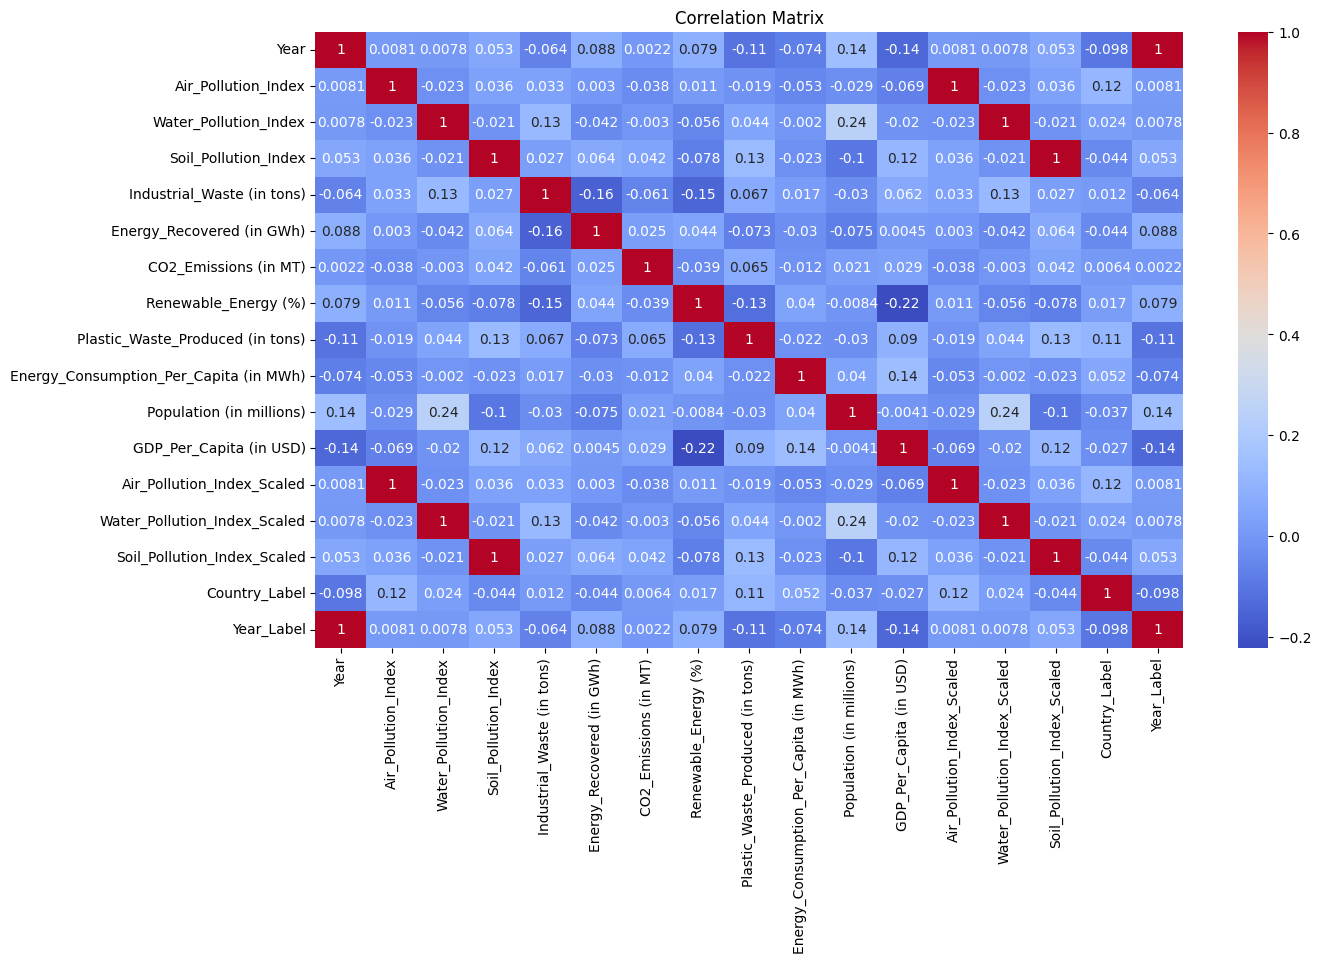

Correlation with CO2 Emissions (in MT):
CO2_Emissions (in MT)                     1.000000
Plastic_Waste_Produced (in tons)          0.065154
Soil_Pollution_Index_Scaled               0.041913
Soil_Pollution_Index                      0.041913
GDP_Per_Capita (in USD)                   0.029267
Energy_Recovered (in GWh)                 0.024758
Population (in millions)                  0.020784
Country_Label                             0.006350
Year_Label                                0.002163
Year                                      0.002163
Water_Pollution_Index_Scaled             -0.002979
Water_Pollution_Index                    -0.002979
Energy_Consumption_Per_Capita (in MWh)   -0.011750
Air_Pollution_Index                      -0.038179
Air_Pollution_Index_Scaled               -0.038179
Renewable_Energy (%)                     -0.038888
Industrial_Waste (in tons)               -0.060737
Name: CO2_Emissions (in MT), dtype: float64


In [343]:
correlation_matrix = d.corr(numeric_only=True)
plt.figure(figsize=(14, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

correlation_with_target = d.corr(numeric_only=True)['CO2_Emissions (in MT)'].sort_values(ascending=False)        
print("Correlation with CO2 Emissions (in MT):")
print(correlation_with_target)

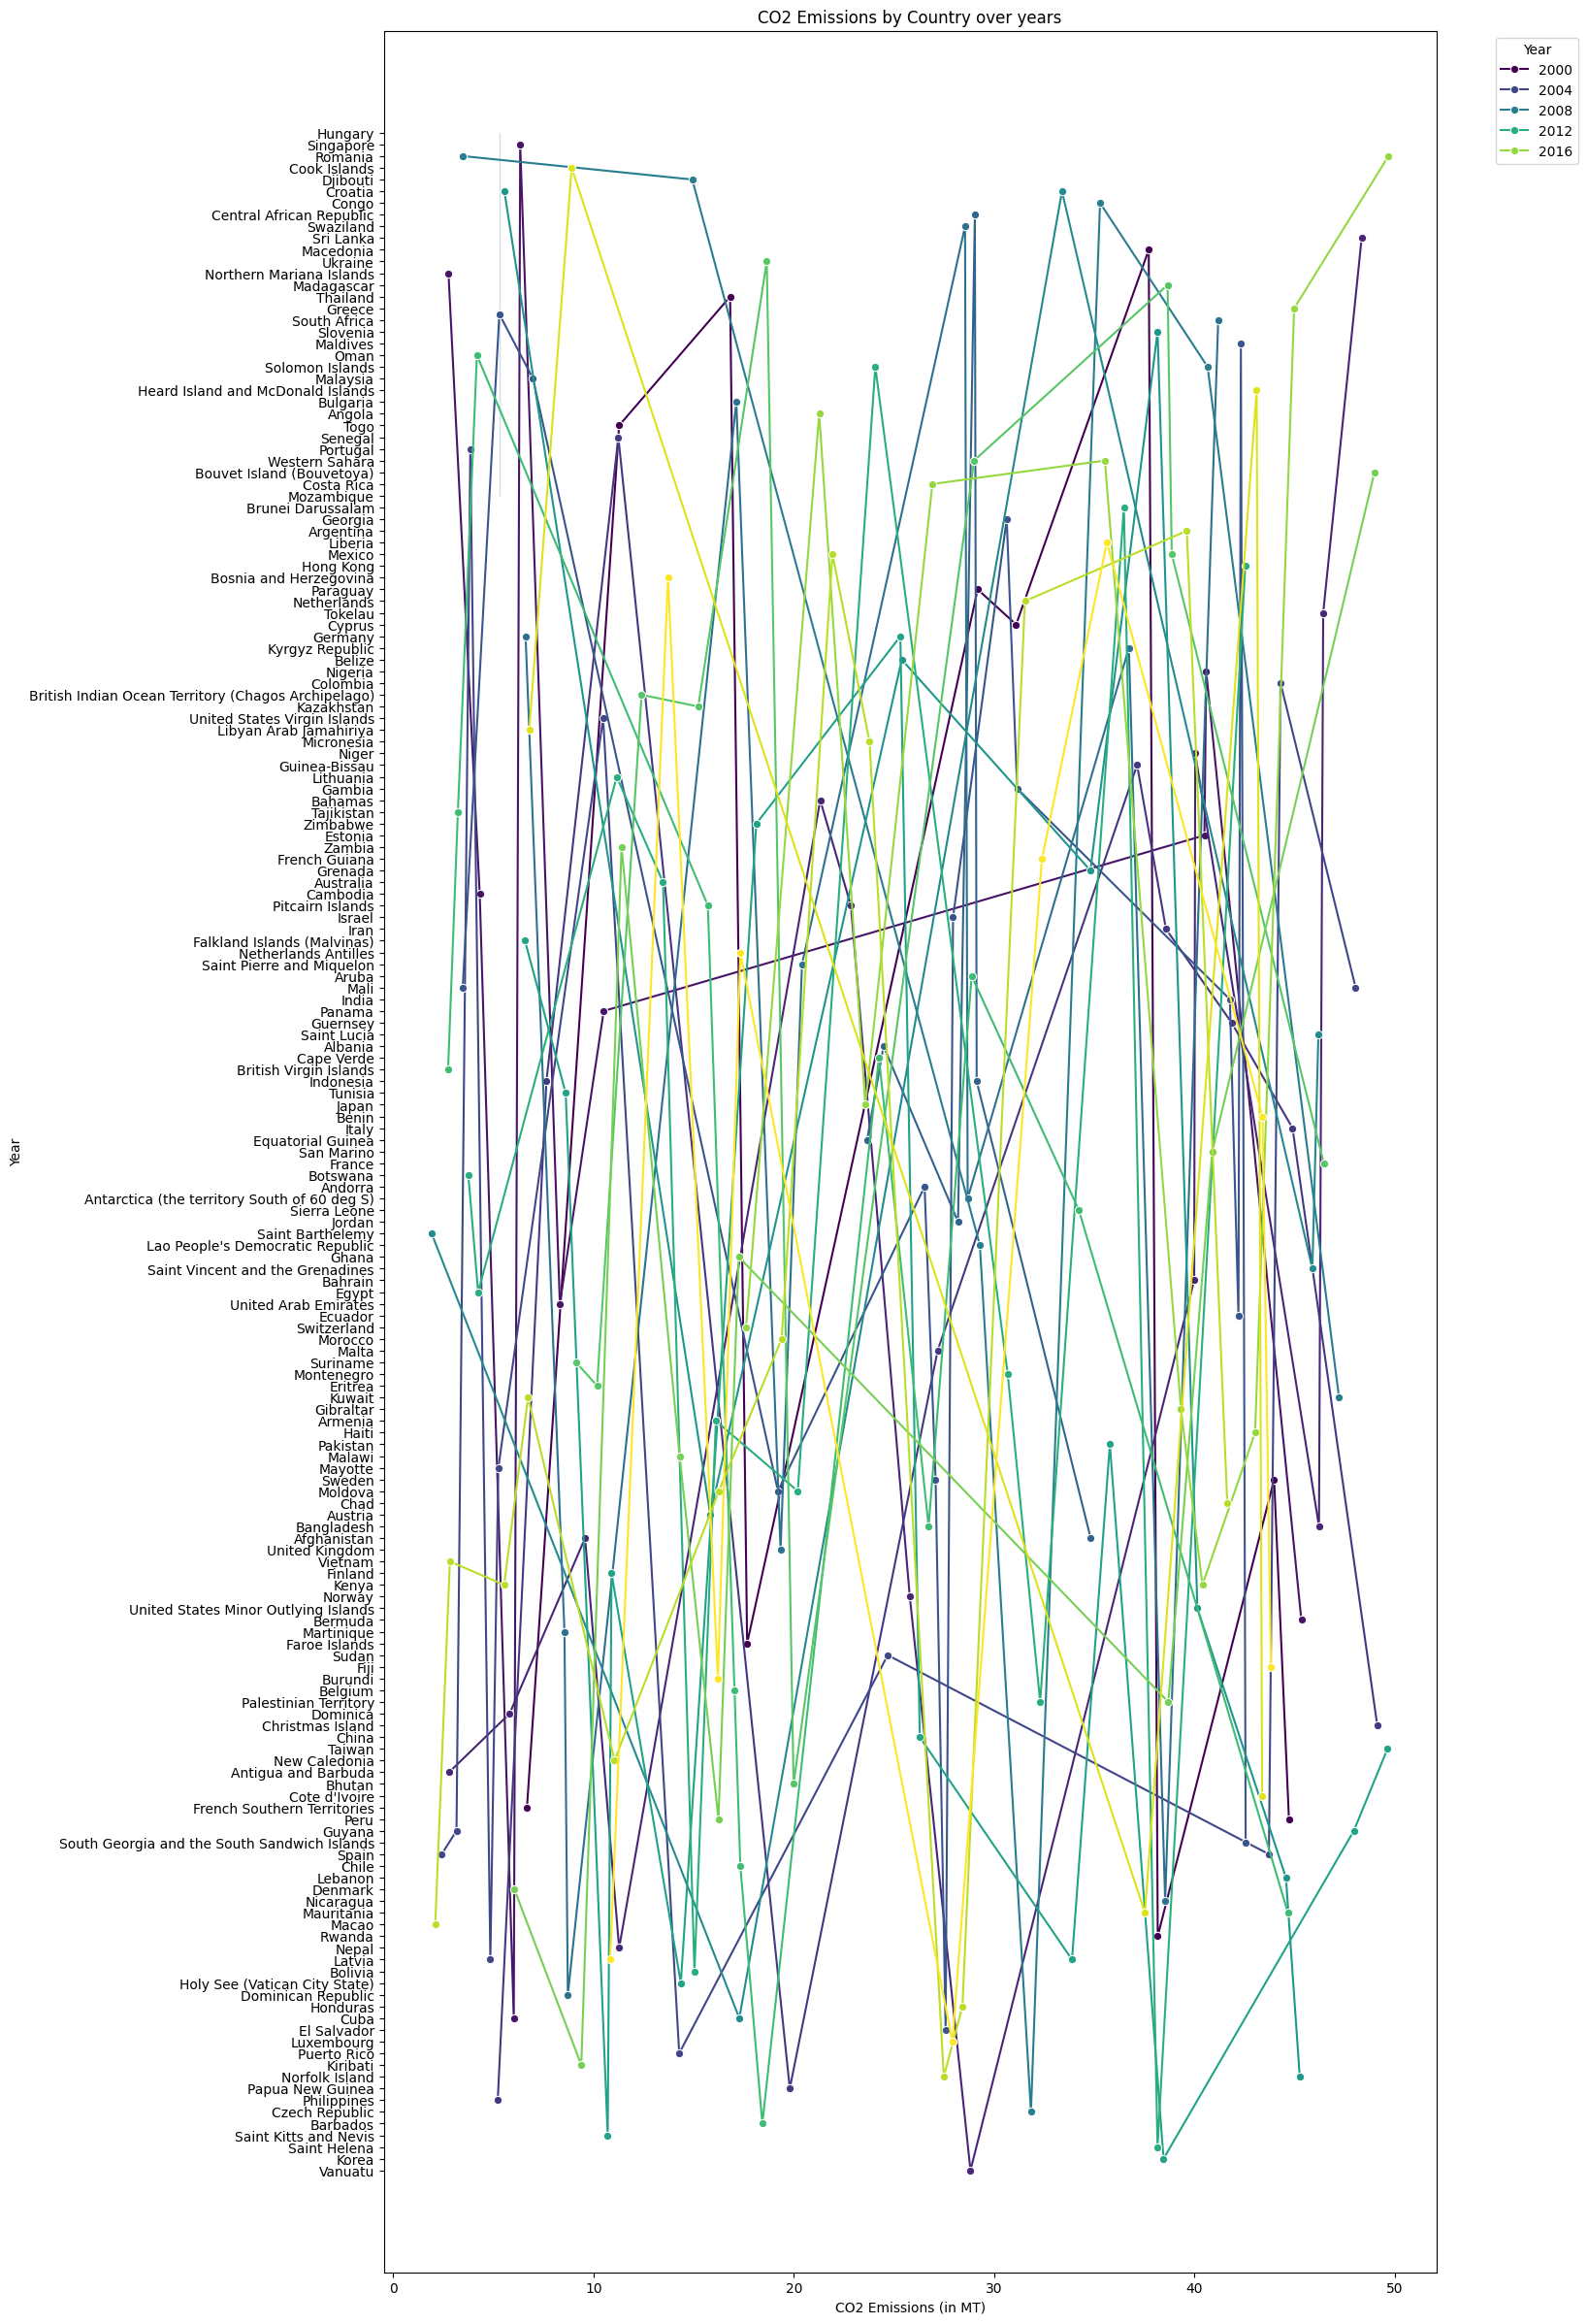

In [344]:
plt.figure(figsize=(14, 30))
sns.lineplot(data=d, y=d['Country'], x=d['CO2_Emissions (in MT)'],hue=d['Year'], marker="o", palette='viridis')
plt.title("CO2 Emissions by Country over years")
plt.xlabel("CO2 Emissions (in MT)")
plt.ylabel("Year")
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

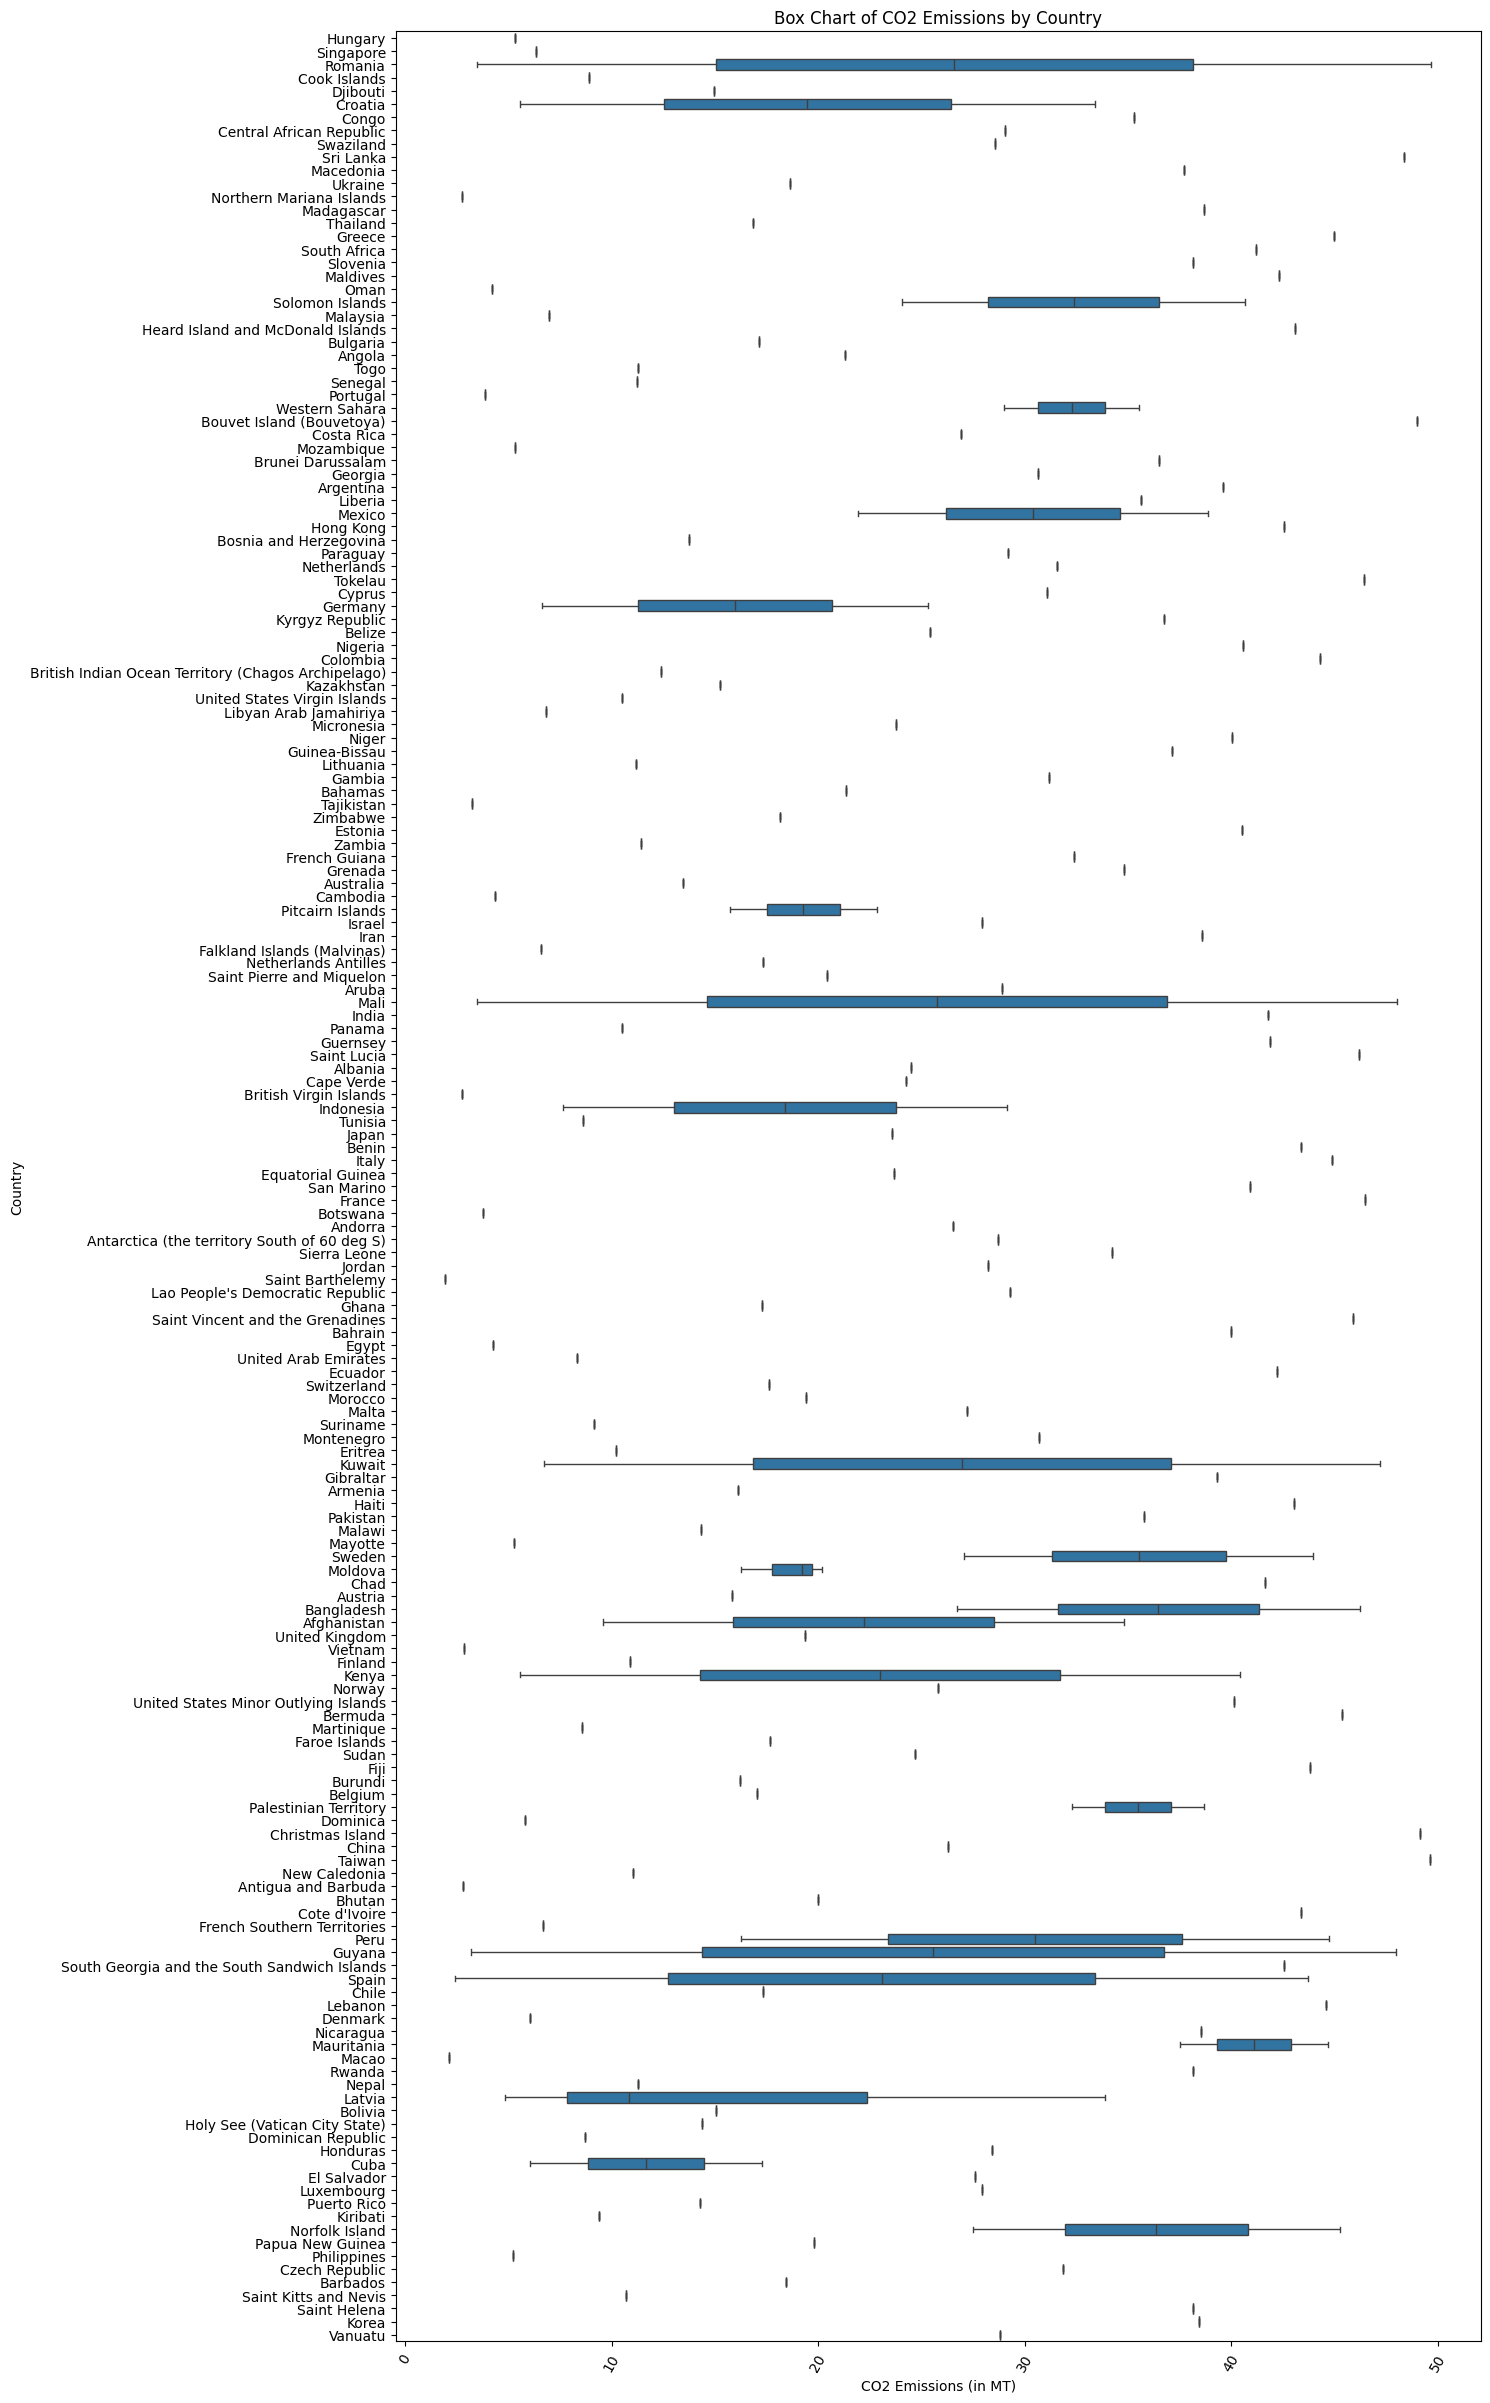

In [345]:
plt.figure(figsize=(14, 30))
sns.boxplot(data=d, y=d['Country'], x=d['CO2_Emissions (in MT)'])
plt.title("Box Chart of CO2 Emissions by Country")
plt.ylabel("Country")
plt.xlabel("CO2 Emissions (in MT)")
plt.xticks(rotation=60)
plt.show()

C:\Users\Princy Pandya\AppData\Local\Temp\ipykernel_4080\1296014978.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=d, y=d['Country_Label'], x=d['CO2_Emissions (in MT)'], palette='viridis')


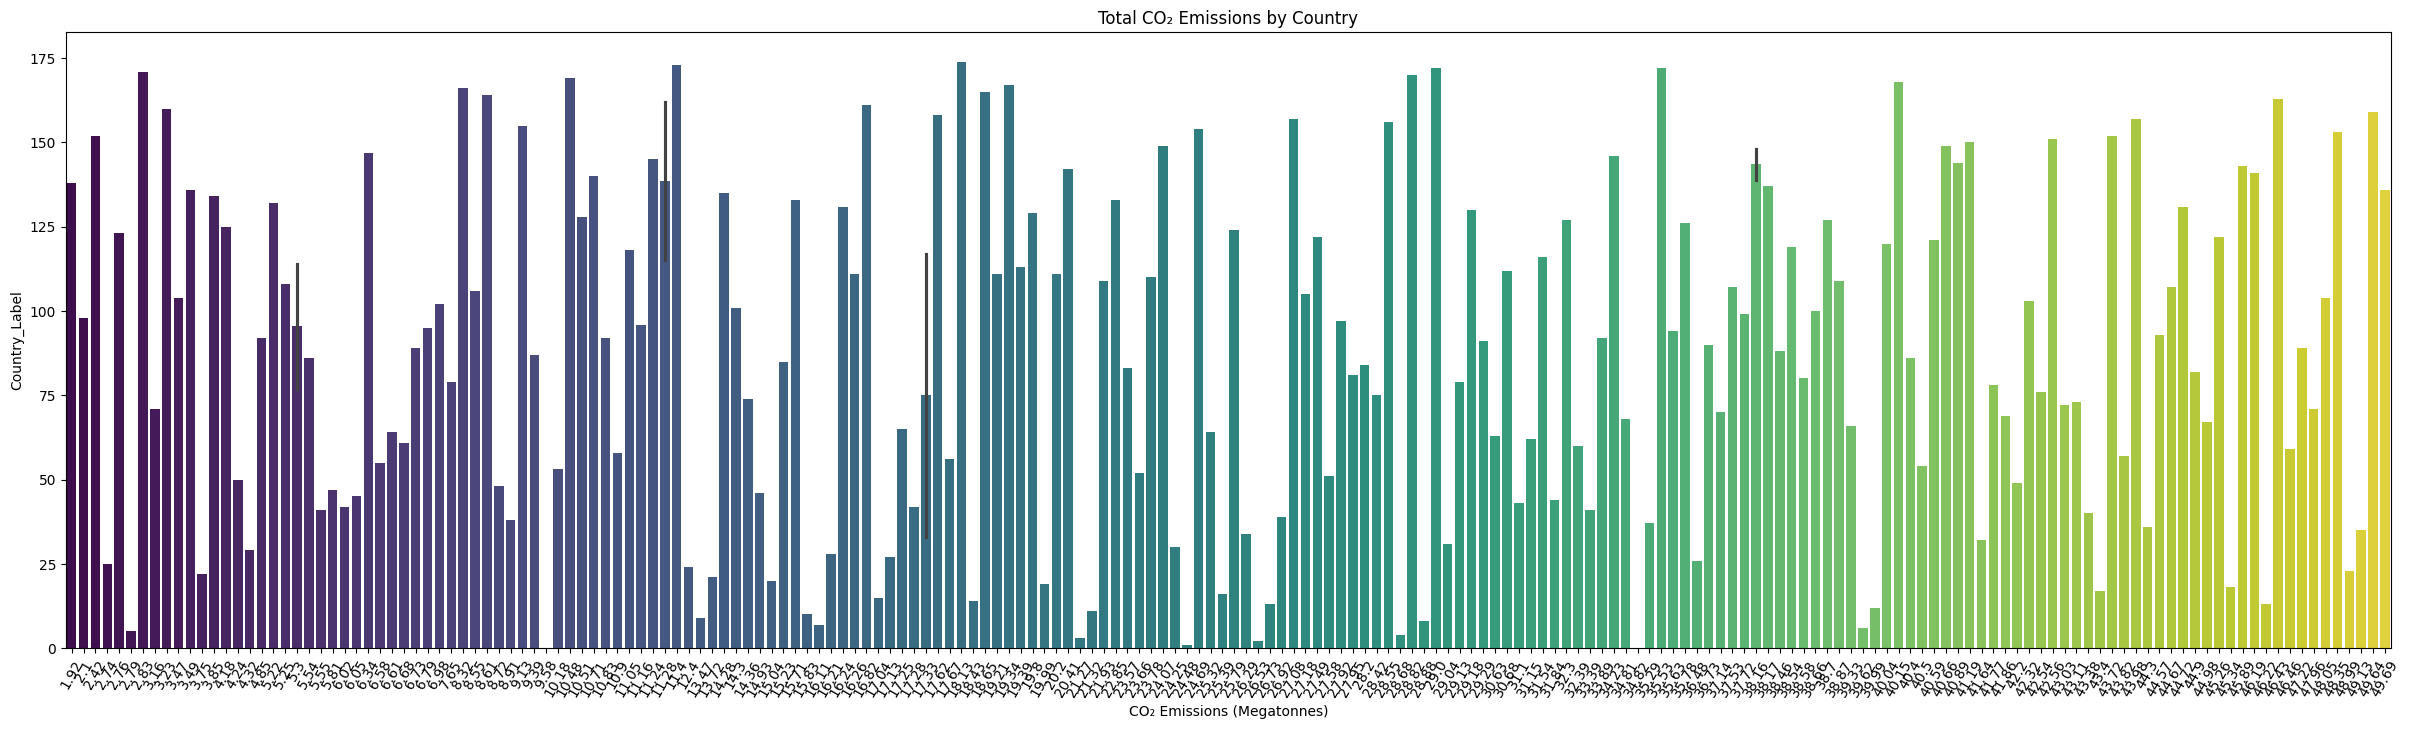

In [346]:
plt.figure(figsize=(30,8))
sns.barplot(data=d, y=d['Country_Label'], x=d['CO2_Emissions (in MT)'], palette='viridis')
plt.title("Total CO₂ Emissions by Country")
plt.xlabel("CO₂ Emissions (Megatonnes)")
plt.ylabel("Country_Label")
plt.xticks(rotation=60)
plt.show()

<h3>Step 3 - Feature Engineering</h3>

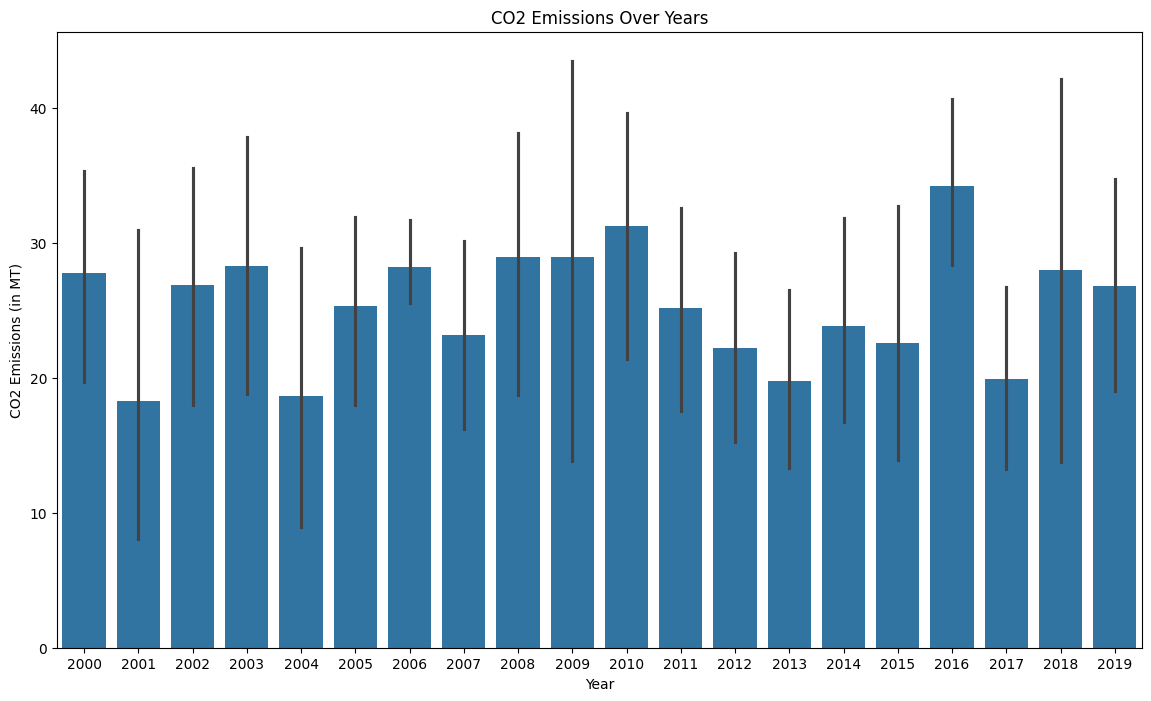

In [347]:
plt.figure(figsize=(14,8))
sns.barplot(data=d, y=d['CO2_Emissions (in MT)'], x=d['Year'])
plt.xlabel("Year")
plt.ylabel("CO2 Emissions (in MT)")
plt.title("CO2 Emissions Over Years")
plt.show()

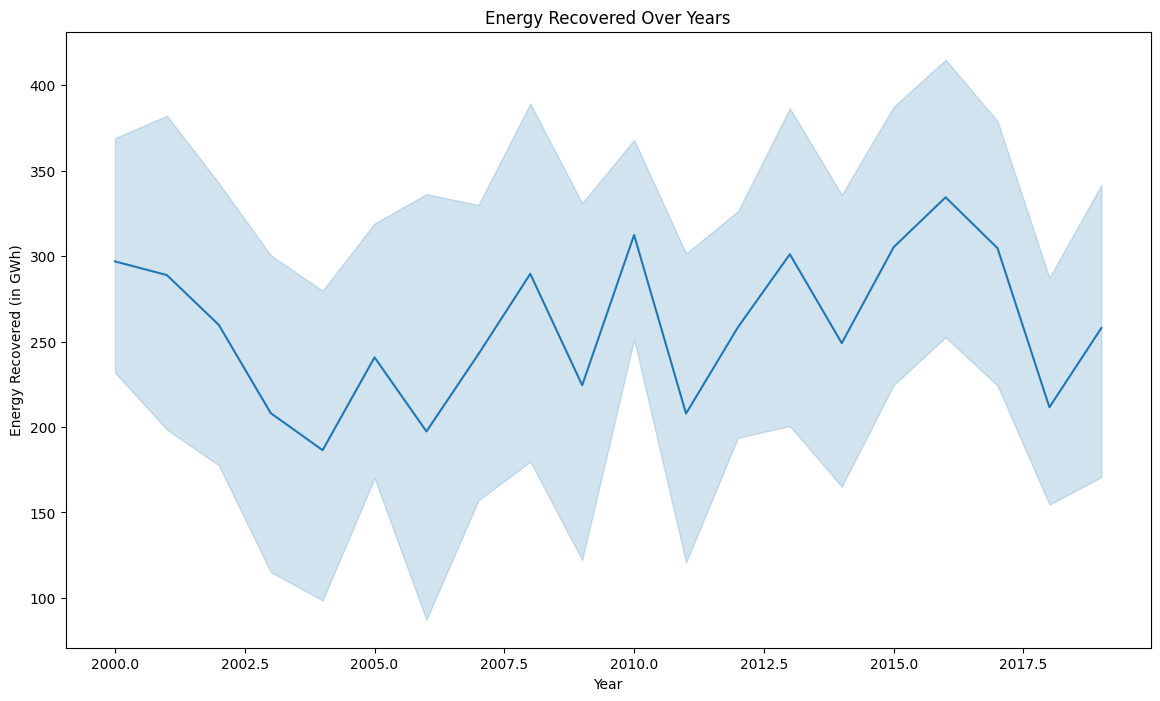

In [348]:
plt.figure(figsize=(14,8))
sns.lineplot(data=d, x=d['Year'], y=d['Energy_Recovered (in GWh)'])
plt.title("Energy Recovered Over Years")
plt.xlabel("Year")
plt.ylabel("Energy Recovered (in GWh)")
plt.show()

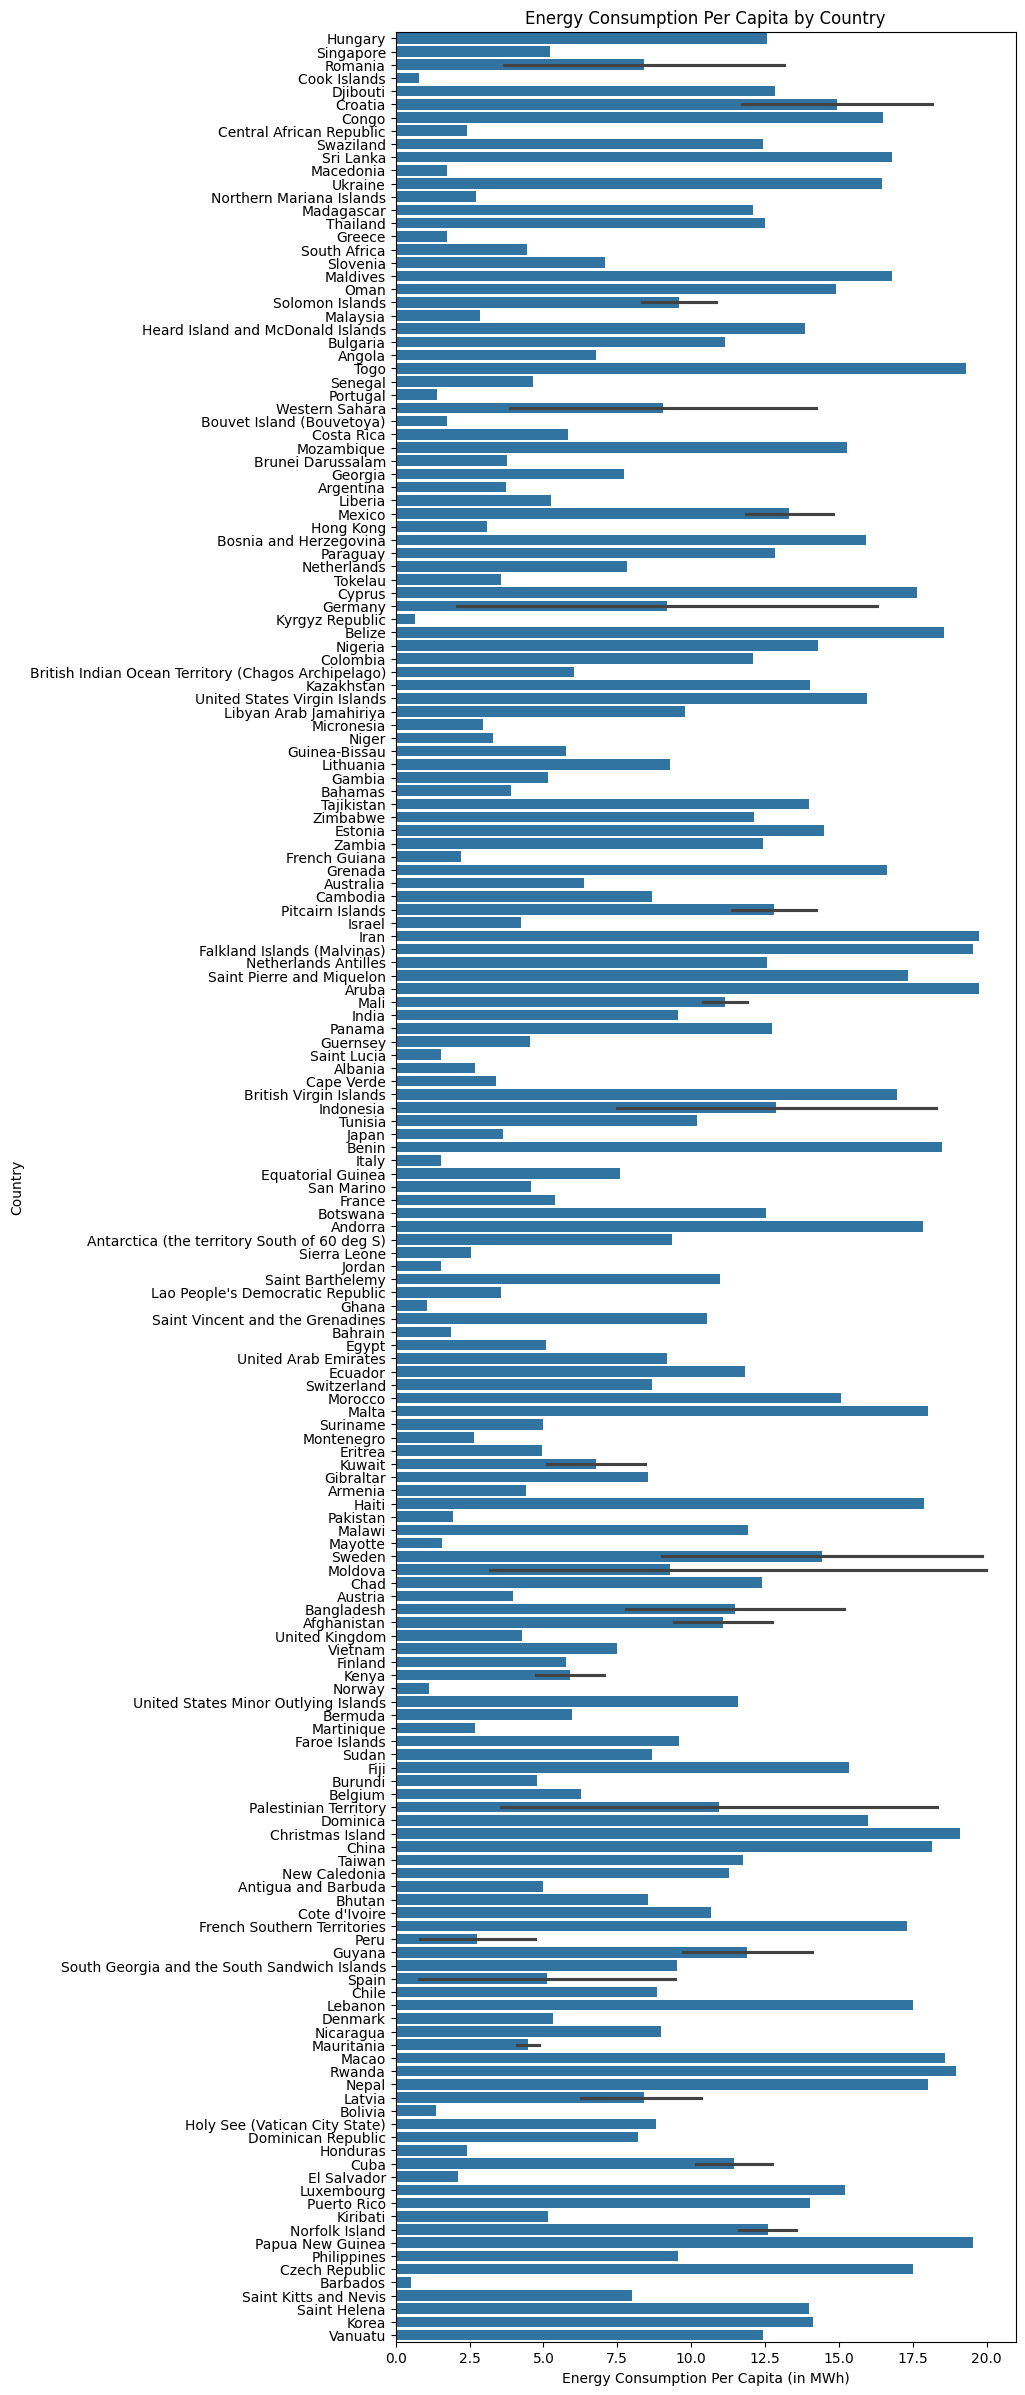

In [349]:
plt.figure(figsize=(8,30))
sns.barplot(data=d, y=d['Country'], x=d['Energy_Consumption_Per_Capita (in MWh)'])
plt.title("Energy Consumption Per Capita by Country")
plt.xlabel("Energy Consumption Per Capita (in MWh)")
plt.ylabel("Country")
plt.title("Energy Consumption Per Capita by Country")
plt.show()

C:\Users\Princy Pandya\AppData\Local\Temp\ipykernel_4080\4173994313.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=d, x=d['Year'], y=d['Energy_Consumption_Per_Capita (in MWh)'], palette='viridis')


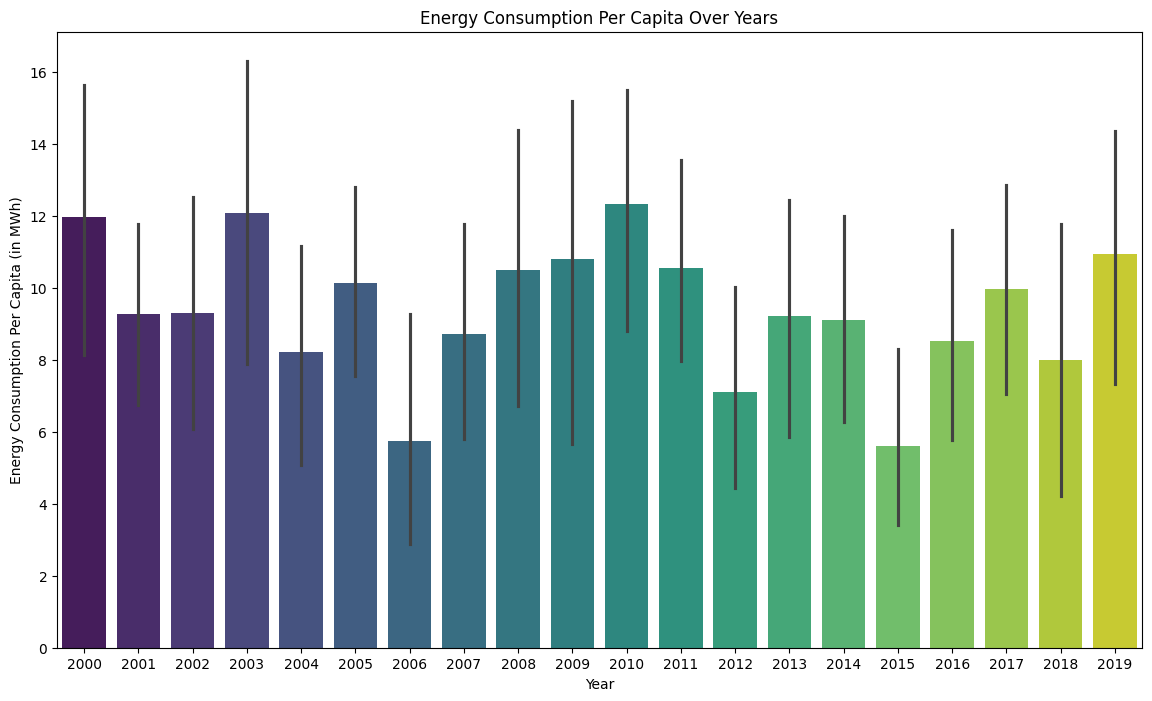

In [350]:
plt.figure(figsize=(14,8))
sns.barplot(data=d, x=d['Year'], y=d['Energy_Consumption_Per_Capita (in MWh)'], palette='viridis')
plt.xlabel("Year")
plt.ylabel("Energy Consumption Per Capita (in MWh)")
plt.title("Energy Consumption Per Capita Over Years")
plt.show()

<h1>Phase 2:<br>Predictive Modeling
</h1>

<h3>Step 4 - Linear Regression Model (for Pollution Prediction)
</h3>

In [351]:
d

,Country,Year,Air_Pollution_Index,Water_Pollution_Index,Soil_Pollution_Index,Industrial_Waste (in tons),Energy_Recovered (in GWh),CO2_Emissions (in MT),Renewable_Energy (%),Plastic_Waste_Produced (in tons),Energy_Consumption_Per_Capita (in MWh),Population (in millions),GDP_Per_Capita (in USD),Air_Pollution_Index_Scaled,Water_Pollution_Index_Scaled,Soil_Pollution_Index_Scaled,Country_Label,Year_Label
0,Hungary,2005,272.70,124.27,51.95,94802.83,158.14,5.30,41.11,37078.88,12.56,42.22,20972.96,1.376167,0.193880,-0.619764,77,5
1,Singapore,2001,86.72,60.34,117.22,56283.92,498.04,6.34,36.44,33128.20,5.23,137.25,34850.41,-1.403578,-1.153098,1.028744,147,1
2,Romania,2016,91.59,83.36,121.72,56256.02,489.51,49.69,9.38,18803.46,13.15,124.47,57773.15,-1.330788,-0.668076,1.142400,136,16
3,Cook Islands,2018,280.61,67.16,93.58,74864.73,145.18,8.91,18.97,9182.27,0.78,67.80,21837.51,1.494394,-1.009403,0.431675,38,18
4,Djibouti,2008,179.16,127.53,121.55,76862.06,40.38,14.93,34.00,39235.12,12.84,186.52,41379.37,-0.021926,0.262567,1.138106,46,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,Latvia,2004,115.84,78.75,42.34,49503.35,81.23,4.85,17.38,4065.66,6.28,92.96,14818.18,-0.968336,-0.765207,-0.862482,92,4
196,Bangladesh,2002,121.82,120.97,63.95,74694.68,25.89,46.22,16.56,36905.26,15.18,114.02,59238.04,-0.878956,0.124351,-0.316683,13,2
197,Korea,2011,149.73,146.92,37.04,2818.85,293.27,38.46,38.36,24700.29,14.11,183.06,28895.94,-0.461800,0.671106,-0.996342,88,11
198,Vanuatu,2002,237.20,113.63,101.96,68746.82,305.61,28.82,32.17,1443.62,12.44,40.65,17068.01,0.845568,-0.030300,0.643326,170,2


In [352]:
features1 = ['Air_Pollution_Index_Scaled', 'Industrial_Waste (in tons)', 'CO2_Emissions (in MT)', 'Population (in millions)']
x1 = d[features1]
y1 = d['Energy_Recovered (in GWh)'].values.reshape(-1,1)

In [353]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1,y1,test_size=0.3, random_state=42)

In [354]:
model1 = LinearRegression()
model1.fit(x1_train, y1_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [355]:
y1_pred = model1.predict(x1_test)
y1_pred

array([[243.8095464 ],
       [259.85454974],
       [300.00975363],
       [244.42870374],
       [235.88074888],
       [288.29352918],
       [251.06617352],
       [268.83183434],
       [267.74366935],
       [224.28625127],
       [288.39015524],
       [251.55035009],
       [295.30699022],
       [236.10946311],
       [264.87839311],
       [291.41831989],
       [297.3572524 ],
       [254.00979102],
       [229.68624541],
       [323.81628421],
       [264.16337236],
       [231.04120893],
       [271.97021133],
       [271.93080839],
       [212.37753419],
       [286.21211717],
       [243.74104455],
       [255.10705757],
       [296.9007434 ],
       [221.36652128],
       [300.71186934],
       [285.14265891],
       [306.48171142],
       [273.18579305],
       [314.45039619],
       [265.20434332],
       [301.62912975],
       [312.41700131],
       [280.55183194],
       [249.2853279 ],
       [310.66019593],
       [293.0141232 ],
       [219.16162561],
       [268

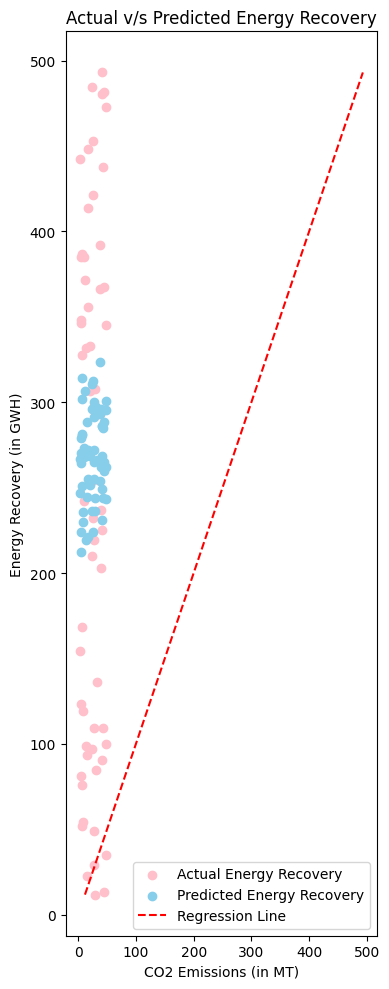

In [356]:
plt.figure(figsize=(4,10))
plt.scatter(x1_test['CO2_Emissions (in MT)'],y1_test,color='pink', label='Actual Energy Recovery')
plt.scatter(x1_test['CO2_Emissions (in MT)'],y1_pred,color='skyblue', label='Predicted Energy Recovery')
plt.plot([y1_test.min(),y1_test.max()],[y1_test.min(),y1_test.max()],'r--',label='Regression Line')
plt.title('Actual v/s Predicted Energy Recovery')
plt.xlabel('CO2 Emissions (in MT)')
plt.ylabel('Energy Recovery (in GWH)')
plt.legend()
plt.tight_layout()
plt.show()

In [357]:
mse = mean_squared_error(y1_test,y1_pred)
mae = mean_absolute_error(y1_test,y1_pred)
rsquared = model1.score(x1_test,y1_test)

print('Mean squared error : ',mse)
print('Mean absolute error : ',mae)
print('r squared (accuracy) : ',rsquared)

Mean squared error :  22548.84167404821
Mean absolute error :  133.57531391845018
r squared (accuracy) :  0.0012488528438489022


<h3>Step 5 - Logistic Regression Model (for Categorization of Pollution Levels)</h3>

In [358]:
flag1_co2 = (min_co2+mean_co2)/2
flag2_co2 = (max_co2+mean_co2)/2
print(f"Flag 1 for CO2 Emissions: {flag1_co2}")
print(f"Flag 2 for CO2 Emissions: {flag2_co2}")

Flag 1 for CO2 Emissions: 13.399049999999999
Flag 2 for CO2 Emissions: 37.28405


In [359]:
d.loc[d['CO2_Emissions (in MT)'] < flag1_co2, 'Pollution_severity'] = 'Low'
d.loc[(d['CO2_Emissions (in MT)'] >= flag1_co2) & (d['CO2_Emissions (in MT)'] < flag2_co2), 'Pollution_severity'] = 'Medium'
d.loc[d['CO2_Emissions (in MT)'] >= flag2_co2, 'Pollution_severity'] = 'High'

d

,Country,Year,Air_Pollution_Index,Water_Pollution_Index,Soil_Pollution_Index,Industrial_Waste (in tons),Energy_Recovered (in GWh),CO2_Emissions (in MT),Renewable_Energy (%),Plastic_Waste_Produced (in tons),Energy_Consumption_Per_Capita (in MWh),Population (in millions),GDP_Per_Capita (in USD),Air_Pollution_Index_Scaled,Water_Pollution_Index_Scaled,Soil_Pollution_Index_Scaled,Country_Label,Year_Label,Pollution_severity
0,Hungary,2005,272.70,124.27,51.95,94802.83,158.14,5.30,41.11,37078.88,12.56,42.22,20972.96,1.376167,0.193880,-0.619764,77,5,Low
1,Singapore,2001,86.72,60.34,117.22,56283.92,498.04,6.34,36.44,33128.20,5.23,137.25,34850.41,-1.403578,-1.153098,1.028744,147,1,Low
2,Romania,2016,91.59,83.36,121.72,56256.02,489.51,49.69,9.38,18803.46,13.15,124.47,57773.15,-1.330788,-0.668076,1.142400,136,16,High
3,Cook Islands,2018,280.61,67.16,93.58,74864.73,145.18,8.91,18.97,9182.27,0.78,67.80,21837.51,1.494394,-1.009403,0.431675,38,18,Low
4,Djibouti,2008,179.16,127.53,121.55,76862.06,40.38,14.93,34.00,39235.12,12.84,186.52,41379.37,-0.021926,0.262567,1.138106,46,8,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,Latvia,2004,115.84,78.75,42.34,49503.35,81.23,4.85,17.38,4065.66,6.28,92.96,14818.18,-0.968336,-0.765207,-0.862482,92,4,Low
196,Bangladesh,2002,121.82,120.97,63.95,74694.68,25.89,46.22,16.56,36905.26,15.18,114.02,59238.04,-0.878956,0.124351,-0.316683,13,2,High
197,Korea,2011,149.73,146.92,37.04,2818.85,293.27,38.46,38.36,24700.29,14.11,183.06,28895.94,-0.461800,0.671106,-0.996342,88,11,High
198,Vanuatu,2002,237.20,113.63,101.96,68746.82,305.61,28.82,32.17,1443.62,12.44,40.65,17068.01,0.845568,-0.030300,0.643326,170,2,Medium


In [360]:
d['Pollution_severity'].isnull().sum()

np.int64(0)

In [361]:
features2= ['Air_Pollution_Index_Scaled', 'Industrial_Waste (in tons)', 'CO2_Emissions (in MT)', 'Population (in millions)']
x2=d[features2]
y2=d['Pollution_severity'].values.ravel()

In [362]:
y2.reshape(-1,1)

array([['Low'],
       ['Low'],
       ['High'],
       ['Low'],
       ['Medium'],
       ['Medium'],
       ['Medium'],
       ['Medium'],
       ['Medium'],
       ['High'],
       ['High'],
       ['Medium'],
       ['Low'],
       ['High'],
       ['Medium'],
       ['High'],
       ['High'],
       ['High'],
       ['High'],
       ['Low'],
       ['Medium'],
       ['Low'],
       ['High'],
       ['Medium'],
       ['Medium'],
       ['Low'],
       ['Low'],
       ['Low'],
       ['Medium'],
       ['High'],
       ['Medium'],
       ['Low'],
       ['Medium'],
       ['Medium'],
       ['High'],
       ['Medium'],
       ['Medium'],
       ['High'],
       ['Medium'],
       ['Medium'],
       ['Medium'],
       ['High'],
       ['Medium'],
       ['Medium'],
       ['Medium'],
       ['Medium'],
       ['High'],
       ['High'],
       ['Low'],
       ['Medium'],
       ['Low'],
       ['Low'],
       ['Medium'],
       ['High'],
       ['Medium'],
       ['Low'],
       ['M

In [363]:
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.3, random_state=42)

In [364]:
model2 = LogisticRegression()
model2.fit(x2_train, y2_train)


d:\ML Course\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [365]:
y2_pred = model2.predict(x2_test)
y2_pred.ravel()

array(['Medium', 'High', 'High', 'Medium', 'Low', 'High', 'Low', 'Medium',
       'Low', 'Medium', 'Medium', 'Medium', 'High', 'Medium', 'High',
       'Medium', 'High', 'Medium', 'Low', 'High', 'Low', 'Medium',
       'Medium', 'High', 'Low', 'High', 'Medium', 'Medium', 'High', 'Low',
       'High', 'High', 'Medium', 'Low', 'Medium', 'Medium', 'Medium',
       'High', 'Low', 'Medium', 'Medium', 'High', 'Low', 'Medium', 'Low',
       'Low', 'High', 'Low', 'Low', 'High', 'Low', 'Medium', 'Medium',
       'Medium', 'Medium', 'High', 'Low', 'High', 'High', 'Medium'],
      dtype=object)

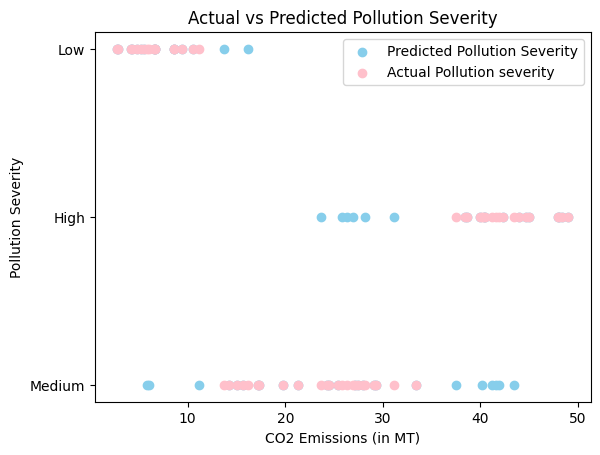

In [366]:
plt.Figure(figsize=(14,8))
plt.scatter(x2_test['CO2_Emissions (in MT)'], y2_pred, color='skyblue', label='Predicted Pollution Severity')
plt.scatter(x2_test['CO2_Emissions (in MT)'], y2_test, color='pink', label='Actual Pollution severity')
plt.title('Actual vs Predicted Pollution Severity')
plt.xlabel('CO2 Emissions (in MT)')
plt.ylabel('Pollution Severity')
plt.legend()
plt.show()

When you're calculating recall for multiple classes, there are several ways to combine the recall values of individual classes into a single number.<br>That's what the average parameter controls.

Recall tells you : "Out of all the actual 'Low' (or 'Medium', or 'High') pollution samples, how many did the model correctly identify?"<br>
So if 100 samples are actually "High", and your model predicted 90 of them correctly, the recall for "High" is 90%.

| Class  | Total Samples | Correct Predictions | Recall |
| ------ | ------------- | ------------------- | ------ |
| Low    | 10            | 7                   | 70%    |
| Medium | 20            | 14                  | 70%    |
| High   | 70            | 63                  | 90%    |


if avereage='macro': <br>
averages all recalls equally.<br>
(70 + 70 + 90) / 3 = 76.67%

if average='weighted':<br>
Gives more importance to bigger classes (like High with 70 samples)<br>
Recall = (10×0.7 + 20×0.7 + 70×0.9) / (10 + 20 + 70) = (7 + 14 + 63) / 100 = 84%

So 'weighted' gives a more realistic score when some classes are more frequent than others.

In [367]:
accuracy = accuracy_score(y2_test, y2_pred)
precision = precision_score(y2_test, y2_pred, average='weighted')
f1score = f1_score(y2_test, y2_pred, average='weighted')
recall = recall_score(y2_test, y2_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"F1 Score: {f1score}")
print(f"Recall: {recall}")

Accuracy: 0.7166666666666667
Precision: 0.7205833333333334
F1 Score: 0.7182951968666255
Recall: 0.7166666666666667


In [368]:
lb = LabelEncoder()
# converts y into numbers
# Low = 0, Medium = 1, High = 2
y = lb.fit_transform(y2)
y=y.ravel()
x = x2

In [369]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [370]:
model1.fit(x_train, y_train)
y_pred = model1.predict(x_test)
y_pred

array([0.94291452, 0.67026742, 1.04277004, 1.44295433, 1.63690987,
       0.55098226, 1.65106133, 1.42973758, 1.47644102, 1.23081222,
       1.19843383, 1.33807059, 0.56875222, 1.14070402, 0.65927932,
       1.16603962, 0.94004205, 0.98310214, 1.61804287, 0.71065523,
       1.68212928, 0.78049005, 1.41043422, 0.9690681 , 1.73695778,
       0.79151141, 0.77659423, 0.98650112, 1.06063102, 1.44211337,
       0.58589629, 0.6454287 , 1.40170179, 1.57618693, 1.4938707 ,
       1.03089977, 1.4873944 , 1.00628838, 1.54708282, 0.68777692])

In [371]:
y_pred_class = y_pred.round().astype(int).clip(0,2)
y_pred_class

array([1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1])

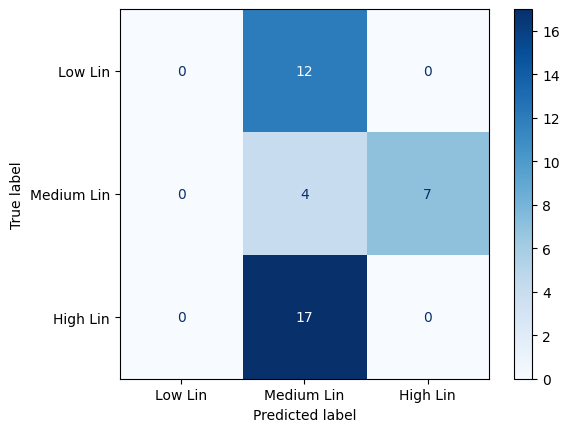

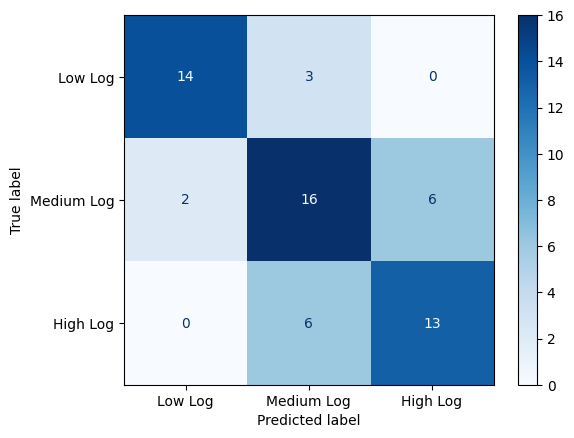

In [372]:
# Confusion Matrices
cm_lin = confusion_matrix(y_test, y_pred_class)
ConfusionMatrixDisplay(confusion_matrix=cm_lin, display_labels=['Low Lin', 'Medium Lin', 'High Lin']).plot(cmap='Blues')

cm_log = confusion_matrix(y2_test, y2_pred, labels=['Low', 'Medium', 'High'])
ConfusionMatrixDisplay(confusion_matrix=cm_log, display_labels=['Low Log', 'Medium Log', 'High Log']).plot(cmap='Blues')


In [373]:
# Classification Reports
cr_lin = classification_report(y_test, y_pred_class, target_names=['Low', 'Medium', 'High'])
cr_log = classification_report(y2_test, y2_pred, target_names=['Low', 'Medium', 'High'])

# Print Classification Reports
print("Linear Regression Classification Report:\n", cr_lin)
print("Logistic Regression Classification Report:\n", cr_log)

Linear Regression Classification Report:
               precision    recall  f1-score   support

         Low       0.00      0.00      0.00        12
      Medium       0.12      0.36      0.18        11
        High       0.00      0.00      0.00        17

    accuracy                           0.10        40
   macro avg       0.04      0.12      0.06        40
weighted avg       0.03      0.10      0.05        40

Logistic Regression Classification Report:
               precision    recall  f1-score   support

         Low       0.68      0.68      0.68        19
      Medium       0.88      0.82      0.85        17
        High       0.64      0.67      0.65        24

    accuracy                           0.72        60
   macro avg       0.73      0.72      0.73        60
weighted avg       0.72      0.72      0.72        60



d:\ML Course\.venv\lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\ML Course\.venv\lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\ML Course\.venv\lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


Logistic Regression : <br>
Features may not separate classes well<br>
Or the model needs tuning (e.g., better feature scaling, regularization, or hyperparameters)

Linear Regression performed better overall on this dataset:<br>
Higher accuracy, More balanced precision, recall, and f1-score